# Projekt 2
## Analiza zbioru danych **"e-shop clothing 2008"**
## Kamień milowy 1: EDA
Autorzy: Laura Hoang, Piotr Bielecki

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

#### Import danych i szybki przegląd
Dane zostały pobrane ze zbioru https://archive.ics.uci.edu/ml/datasets/clickstream+data+for+online+shopping .

In [2]:
data = pd.read_csv('e-shop data and description/e-shop clothing 2008.csv', sep=';')
data

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

#### Rozmiar danych
Jest 165474 rekordów (czyli mamy bardzo dużo danych) oraz 14 cech (1 kategoryczna, pozostałe 13 liczbowe).

#### Braki danych
Nie ma braków danych.

#### Opis zmiennych

1. YEAR (2008)


2. MONTH -> from April (4) to August (8)


3. DAY -> day number of the month


4. ORDER -> sequence of clicks during one session


5. COUNTRY -> variable indicating the country of origin of the IP address with the 
following categories: *1-Australia, 
2-Austria, 
3-Belgium, 
4-British Virgin Islands,
5-Cayman Islands,
6-Christmas Island,
7-Croatia,
8-Cyprus,
9-Czech Republic,
10-Denmark,
11-Estonia,
12-unidentified,
13-Faroe Islands,
14-Finland,
15-France,
16-Germany,
17-Greece,
18-Hungary,
19-Iceland,
20-India,
21-Ireland,
22-Italy,
23-Latvia,
24-Lithuania,
25-Luxembourg,
26-Mexico,
27-Netherlands,
28-Norway,
29-Poland,
30-Portugal,
31-Romania,
32-Russia,
33-San Marino,
34-Slovakia,
35-Slovenia,
36-Spain,
37-Sweden,
38-Switzerland,
39-Ukraine,
40-United Arab Emirates,
41-United Kingdom,
42-USA,
43-biz (*.biz),
44-com (*.com),
45-int (*.int),
46-net (*.net),
47-org (*.org)*


6. SESSION ID -> variable indicating session id *(short record)*


7. PAGE 1 (MAIN CATEGORY) -> concerns the main product category: *{1-trousers,
2-skirts,
3-blouses,
4-sale}*


8. PAGE 2 (CLOTHING MODEL) -> contains information about the code for each product *(217 products)*


9. COLOUR -> colour of product *{1-beige,
2-black,
3-blue,
4-brown,
5-burgundy,
6-gray,
7-green,
8-navy blue,
9-of many colors,
10-olive,
11-pink,
12-red,
13-violet,
14-white}*


10. LOCATION -> photo location on the page, the screen has been divided into six parts: *{1-top left,
2-top in the middle,
3-top right,
4-bottom left,
5-bottom in the middle,
6-bottom right}*


11. MODEL PHOTOGRAPHY -> variable with two categories: *{1-en face, 2-profile}*


12. PRICE -> price in US dollars


13. PRICE 2 -> variable informing whether the price of a particular product is higher than 
the average price for the entire product category *{1-yes, 2-no}*


14. PAGE -> page number within the e-store website *(from 1 to 5)*

#### Zmienne liczbowe

In [4]:
data.describe()

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


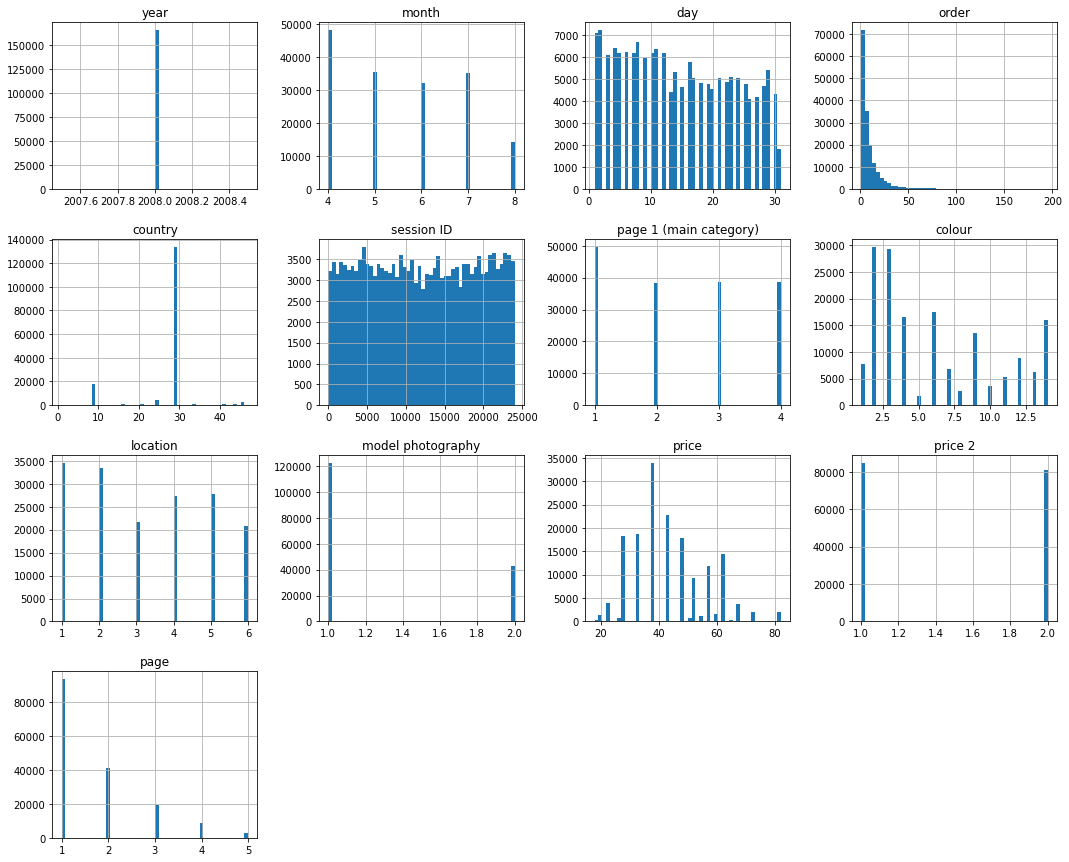

In [5]:
data.hist(bins=50, figsize=(18,15))
plt.show()

Zakresy cech wydają się być optymalne.

#### Zmienne kategoryczne

In [10]:
data['page 2 (clothing model)'].value_counts()

B4     3579
A2     3013
A11    2789
P1     2681
B10    2566
       ... 
P66      46
P22       2
P79       2
P54       1
P28       1
Name: page 2 (clothing model), Length: 217, dtype: int64

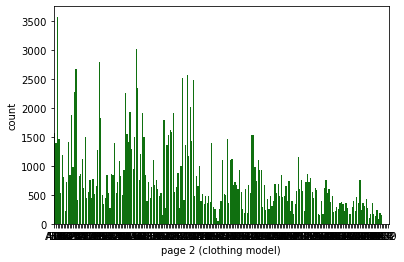

In [8]:
sns.countplot(data=data, x='page 2 (clothing model)', color='green')
plt.show()

Dane są w miarę zbilansowane.

#### Zależności między zmiennymi

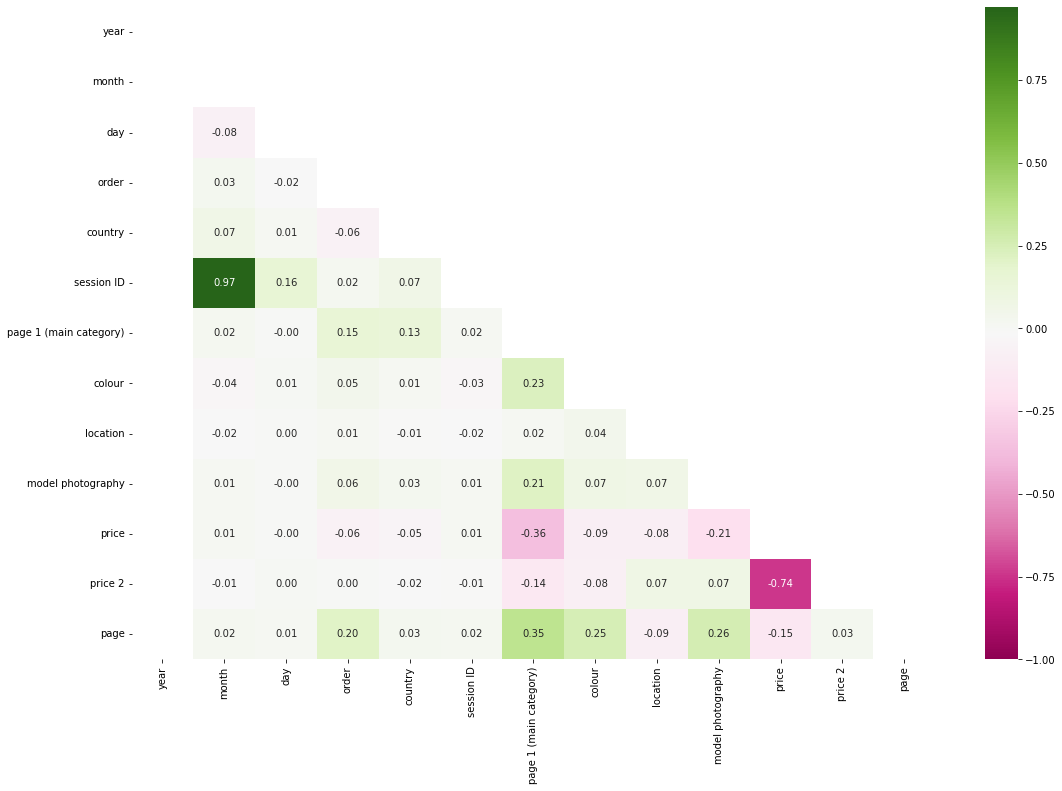

In [19]:
corMatrix = data.corr()
mask = np.triu(np.ones_like(corMatrix, dtype=bool))

plt.figure(figsize=(18, 12))
sns.heatmap(corMatrix, mask=mask, annot=True, vmin=-1, cmap="PiYG", fmt=".2f")
plt.show()

Mamy silną zależność między `session ID`, a `month` (numery sesji rosną wraz z czasem, jednak ponieważ okres badania trwa kilka miesięcy tego samego roku, to rok w danych się nie zmienia i wynosi 2008, a dni miesąca występują od 1 do 31, stąd `session ID` jest skorelowane jedynie ze zmienna `month`).

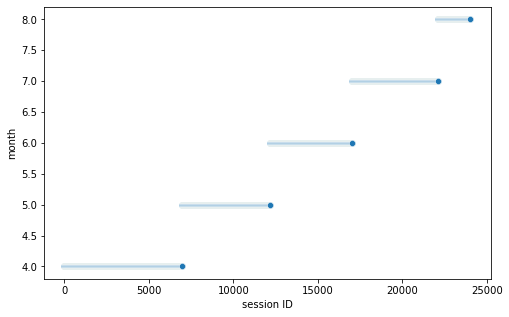

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='session ID', y='month', data=data)
plt.show()

Oprócz tego występuje tu dość silna (ujemna) korelacja między `price 2` i `price`(ma to sens, gdyż `price 2` mówi nam o tym, czy `price` danego produktu jest **wyższa** niż średnia dla danej kategorii)

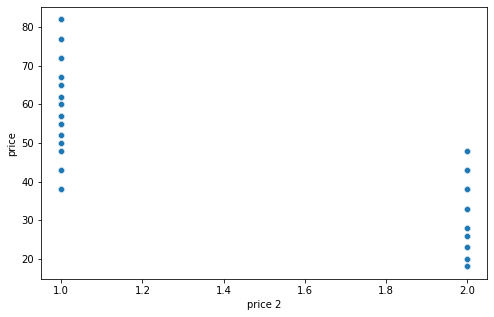

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='price 2', y='price', data=data)
plt.show()

Zbadamy również liczbę kupowanych produktów (ich kategorie) względem miesięcy.

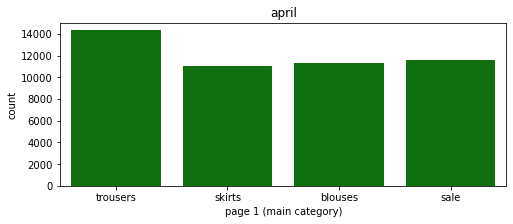

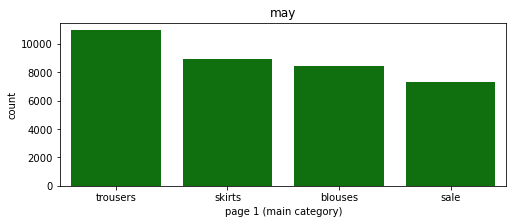

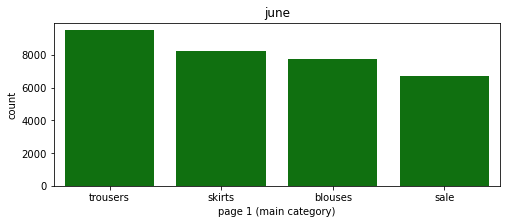

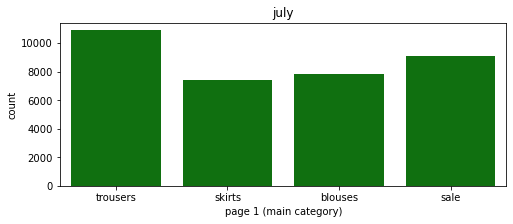

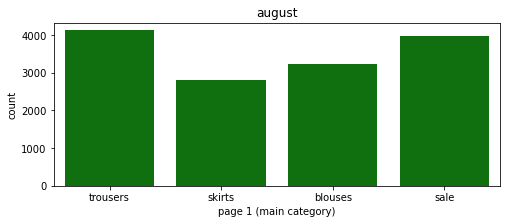

In [44]:
months = ['april','may', 'june', 'july', 'august']

for i in range(5):
    plt.figure(figsize=(8,3))
    sns.countplot(data=data[data['month']==i+4], x='page 1 (main category)', color='green')
    plt.title(label=months[i])
    plt.xticks(np.arange(4), ['trousers', 'skirts', 'blouses', 'sale'])
    plt.show()

Przez badane 4 miesiące przeważa kupno produktów z kategorii **trousers**.

Sprawdźmy też zależność między kolorami a rodzajami produktów:

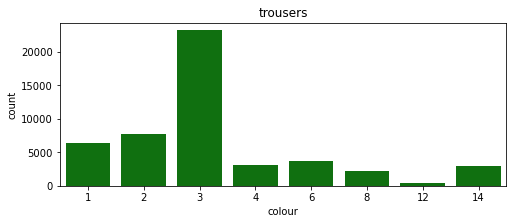

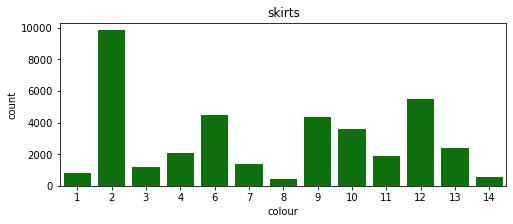

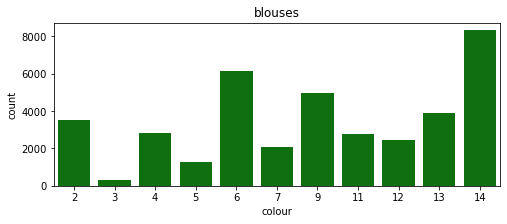

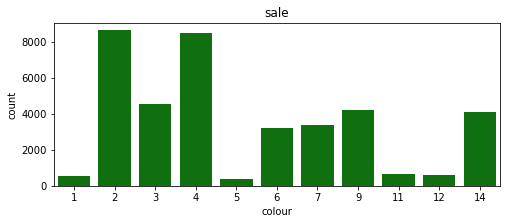

In [71]:
main_category = ['trousers','skirts', 'blouses', 'sale']

for i in range(4):
    plt.figure(figsize=(8,3))
    sns.countplot(data=data[data['page 1 (main category)']==i+1],
                  x='colour', color='green')
    plt.title(label=main_category[i])
    plt.show()


Spodnie najczęściej są w kolorze **niebieskim** (3-blue), spódnice **czarnym** (2-black), koszulki **białym** (14-white), a produkty z kategorii "sale" w **czarnym** i **brązowym**.

#### Podsumowanie
* W zbiorze nie ma braków danych.
* Udało nam się poznać znaczenie zmiennych (co w przypadku niektórych nie było oczywiste).
* Zidentyfikowaliśmy silniej skorelowane zmienne.
